In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from sklearn import metrics
import shap

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("D:\AML_Project\DataSets\WGM_Dataset.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_976\2469213760.py:1: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\AML_Project\DataSets\WGM_Dataset.csv")


In [3]:
data.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
data.drop(columns = ['COUNTRYNEW','WPID_RANDOM','WGT','PROJWT','FIELD_DATE','YEAR_WAVE','MH7B','MH7B_2','MH7C','MH8A','MH8B','MH8C','MH8D','MH8E','MH8F','MH8G','MH8H','MH9A','MH9B','MH9C','MH9D','MH9E',
                   'MH9F','MH9G','MH9H','age_mh'], inplace = True)
data.dropna(inplace=True)

In [4]:
data = data.astype('int64')

In [5]:
data = data[data['MH7A'] != 99]

In [6]:
lable = data.pop("MH7A")

In [7]:
lable.value_counts()

MH7A
2    47042
1    12827
Name: count, dtype: int64

In [8]:
x_train, x_temp, y_train, y_temp = train_test_split(data, lable, test_size=0.5)
x_val, x_test, y_val, y_test =train_test_split(x_temp, y_temp, test_size=0.6)

In [10]:
y_val.value_counts()

MH7A
2    9460
1    2514
Name: count, dtype: int64

In [9]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = rf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)


1.0
0.7958910973776516
0.8006235732977006


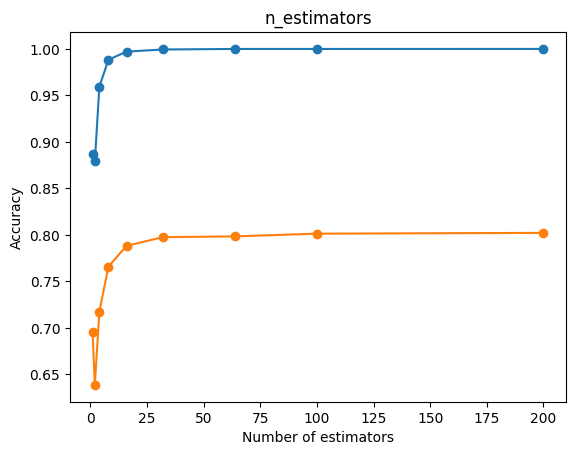

In [10]:
estimators=[1,2,4,8,16,32,64,100,200]
train_result=[]
val_result=[]
for i in estimators:
    rf_=RandomForestClassifier(n_estimators=i)
    rf_.fit(x_train,y_train)
    train_result.append(rf_.score(x_train,y_train))
    y_pred=rf_.predict(x_val)
    val_result.append(accuracy_score(y_val,y_pred))


plt.plot(estimators,train_result, marker='o', linestyle='-')
plt.plot(estimators,val_result, marker='o', linestyle='-')
plt.xlabel("Number of estimators")
plt.ylabel('Accuracy')
plt.title('n_estimators')
plt.show()


[0.7825215474042895, 0.7825215474042895, 0.7825215474042895, 0.7845259571056324, 0.7972205518808044, 0.8249816262444044, 0.8729538317632124, 0.919689984632859, 0.959911805973141, 0.9863032003741565, 0.9964922830226498]
[0.790796726240187, 0.790796726240187, 0.790796726240187, 0.7917153833305495, 0.7948889260063471, 0.7964756973442458, 0.8004843828294639, 0.8021546684483046, 0.7997327543009854, 0.8000668114247537, 0.8009854685151161]


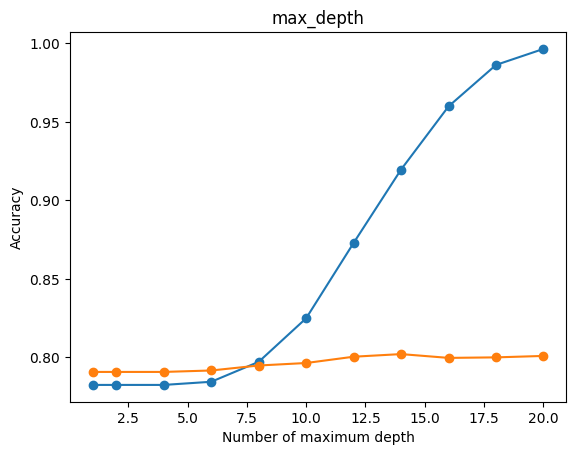

In [11]:
depth=[1,2,4,6,8,10,12,14,16,18,20]
train_result=[]
val_result=[]
for i in depth:
    rf_=RandomForestClassifier(max_depth=i)
    rf_.fit(x_train,y_train)
    train_result.append(rf_.score(x_train,y_train))
    y_pred=rf_.predict(x_val)
    val_result.append(accuracy_score(y_val,y_pred))

print(train_result)
print(val_result)


plt.plot(depth,train_result, marker='o', linestyle='-')
plt.plot(depth,val_result, marker='o', linestyle='-')
plt.xlabel("Number of maximum depth")
plt.ylabel('Accuracy')
plt.title('max_depth')
plt.show()

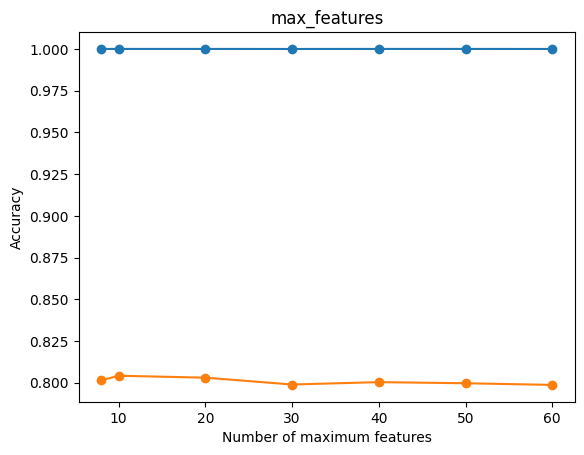

In [13]:
features=[8,10,20,30,40,50,60]
train_result=[]
val_result=[]
for i in features:
    rf_=RandomForestClassifier(max_features=i)
    rf_.fit(x_train,y_train)
    train_result.append(rf_.score(x_train,y_train))
    y_pred=rf_.predict(x_val)
    val_result.append(accuracy_score(y_val,y_pred))





plt.plot(features,train_result, marker='o', linestyle='-')
plt.plot(features,val_result, marker='o', linestyle='-')
plt.xlabel("Number of maximum features")
plt.ylabel('Accuracy')
plt.title('max_features')
plt.show()

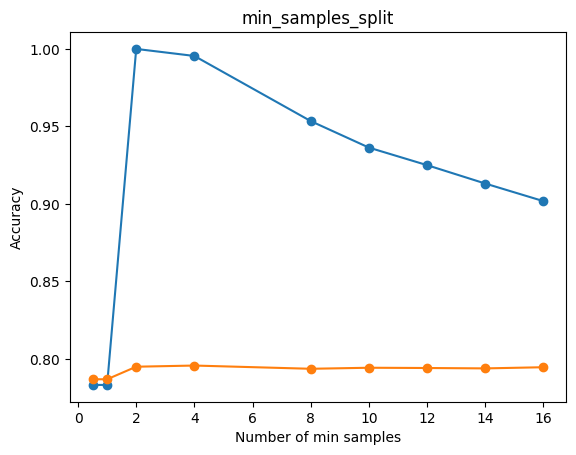

In [ ]:
min_samples_s=[0.5,1.0,2,4,8,10,12,14,16]
train_result=[]
val_result=[]
for i in min_samples_s:
    rf_=RandomForestClassifier(min_samples_split=i)
    rf_.fit(x_train,y_train)
    train_result.append(rf_.score(x_train,y_train))
    y_pred=rf_.predict(x_val)
    val_result.append(accuracy_score(y_val,y_pred))



plt.plot(min_samples_s,train_result, marker='o', linestyle='-')
plt.plot(min_samples_s,val_result, marker='o', linestyle='-')
plt.xlabel("Number of min samples")
plt.ylabel('Accuracy')
plt.title('min_samples_split')
plt.show()

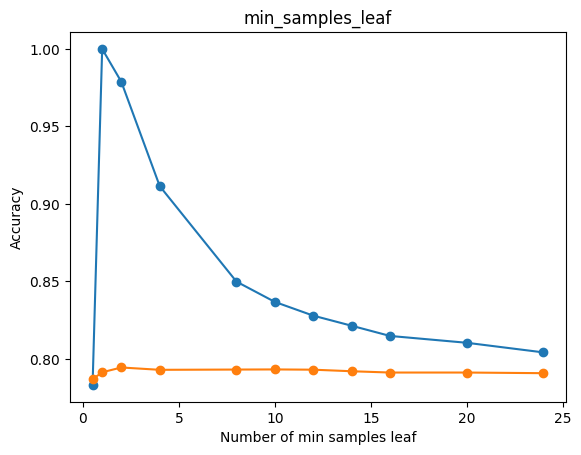

In [ ]:
min_samples_l=[0.5,1,2,4,8,10,12,14,16,20,24]
train_result=[]
val_result=[]
for i in min_samples_l:
    rf_=RandomForestClassifier(min_samples_leaf=i)
    rf_.fit(x_train,y_train)
    train_result.append(rf_.score(x_train,y_train))
    y_pred=rf_.predict(x_val)
    val_result.append(accuracy_score(y_val,y_pred))


plt.plot(min_samples_l,train_result, marker='o', linestyle='-')
plt.plot(min_samples_l,val_result, marker='o', linestyle='-')
plt.xlabel("Number of min samples leaf")
plt.ylabel('Accuracy')
plt.title('min_samples_leaf')
plt.show()

In [10]:
rf=RandomForestClassifier(n_estimators=200,max_features=60,min_samples_split=8, min_samples_leaf=10)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = rf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)


0.8933319970601991
0.7976448972774345
0.8014030399198263


In [27]:
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       0.96      0.51      0.67      6510
           2       0.88      0.99      0.93     23424

    accuracy                           0.89     29934
   macro avg       0.92      0.75      0.80     29934
weighted avg       0.90      0.89      0.88     29934

              precision    recall  f1-score   support

           1       0.57      0.23      0.32      2505
           2       0.82      0.95      0.88      9469

    accuracy                           0.80     11974
   macro avg       0.70      0.59      0.60     11974
weighted avg       0.77      0.80      0.77     11974



In [28]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.55      0.22      0.32      3812
           2       0.82      0.95      0.88     14149

    accuracy                           0.80     17961
   macro avg       0.68      0.59      0.60     17961
weighted avg       0.76      0.80      0.76     17961



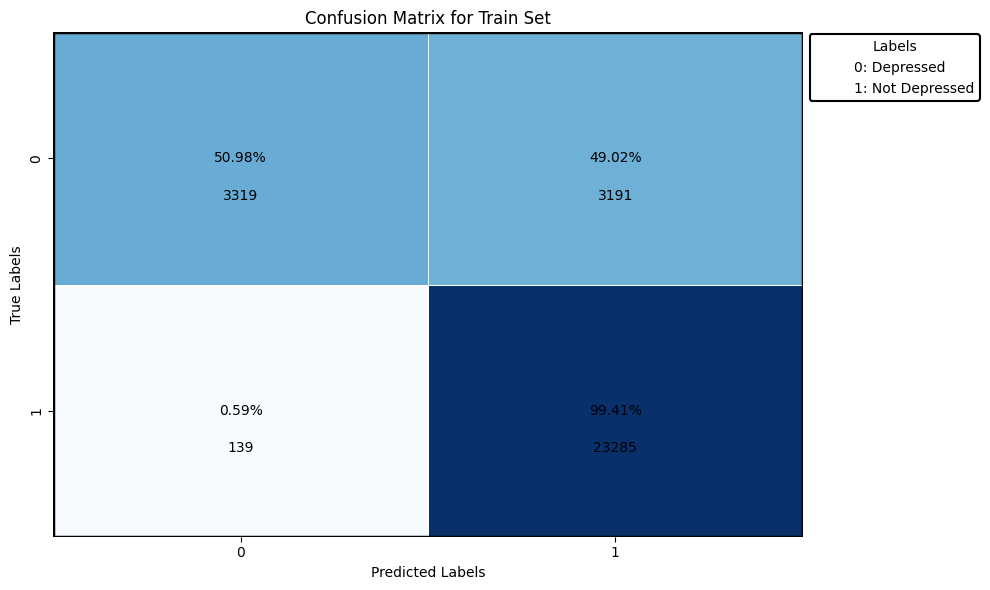

In [29]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    labels = np.unique(y_true)
    num_labels = len(labels)
    
    # Custom label descriptions
    label_descriptions = {
        0: 'Depressed',
        1: 'Not Depressed',
    }
    
    conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_percent = conf_matrix / row_sums * 100
    
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    ax = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, 
                     linewidths=.5)
    
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2f}%",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
            plt.text(j + 0.5, i + 0.65, f"{conf_matrix[i, j]}",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    
    # Add a black border around the entire confusion matrix
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    # Add black border around the heatmap area
    patch = Rectangle(
        (0, 0), conf_matrix.shape[1], conf_matrix.shape[0], 
        fill=False, edgecolor='black', linewidth=2.5
    )
    ax.add_patch(patch)

    # Create custom legend handles with numbers and labels
    legend_elements = [
        Line2D([0], [0], color='w', markerfacecolor='w', markersize=0, label=f'{label-1}: {label_descriptions.get(label-1, "Label " + str(label))}')
        for label in labels
    ]
    
    # Add legend to the plot outside the matrix on the right side
    legend = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.0, 0.93), 
                        frameon=True, framealpha=1, title="Labels")
    
    # Add a black border around the legend box
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1.5)
    
    plt.tight_layout()
    plt.show()

# Now, when you call the function, use it with your original labels
plot_confusion_matrix(y_train, y_train_pred, "Confusion Matrix for Train Set")


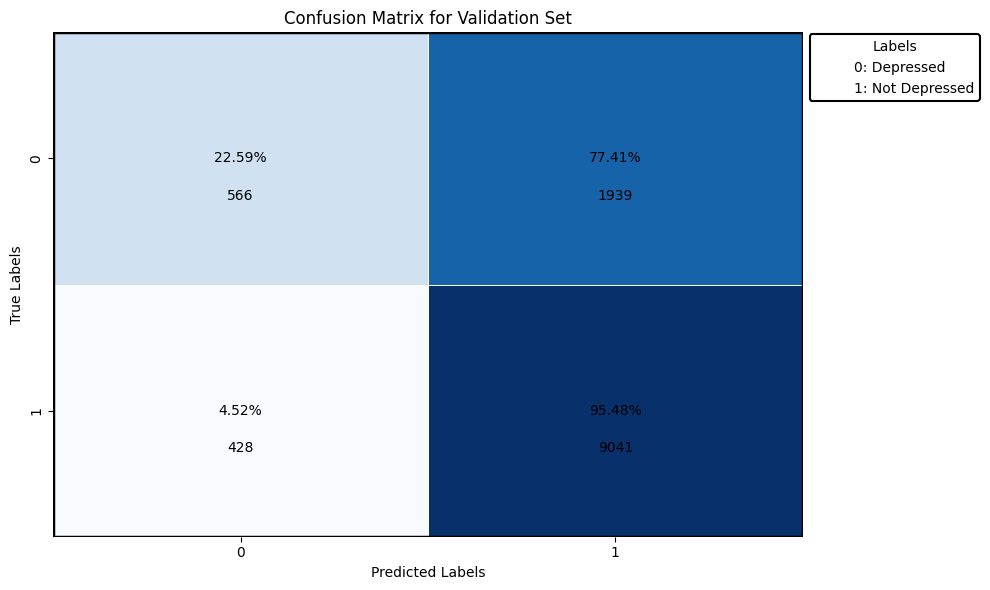

In [30]:
plot_confusion_matrix(y_val, y_val_pred, 'Confusion Matrix for Validation Set')


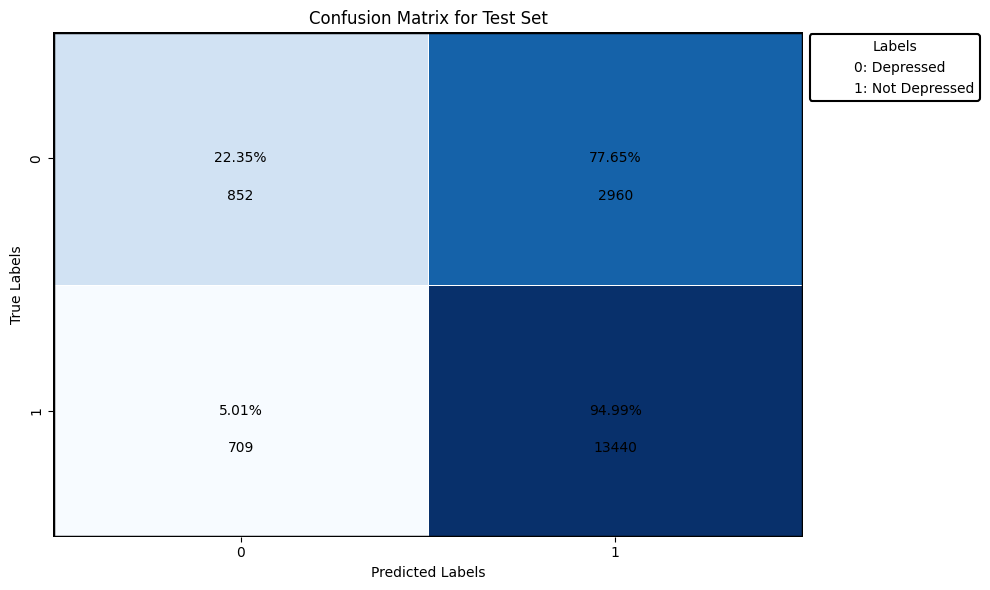

In [31]:
plot_confusion_matrix(y_test, y_test_pred,'Confusion Matrix for Test Set')

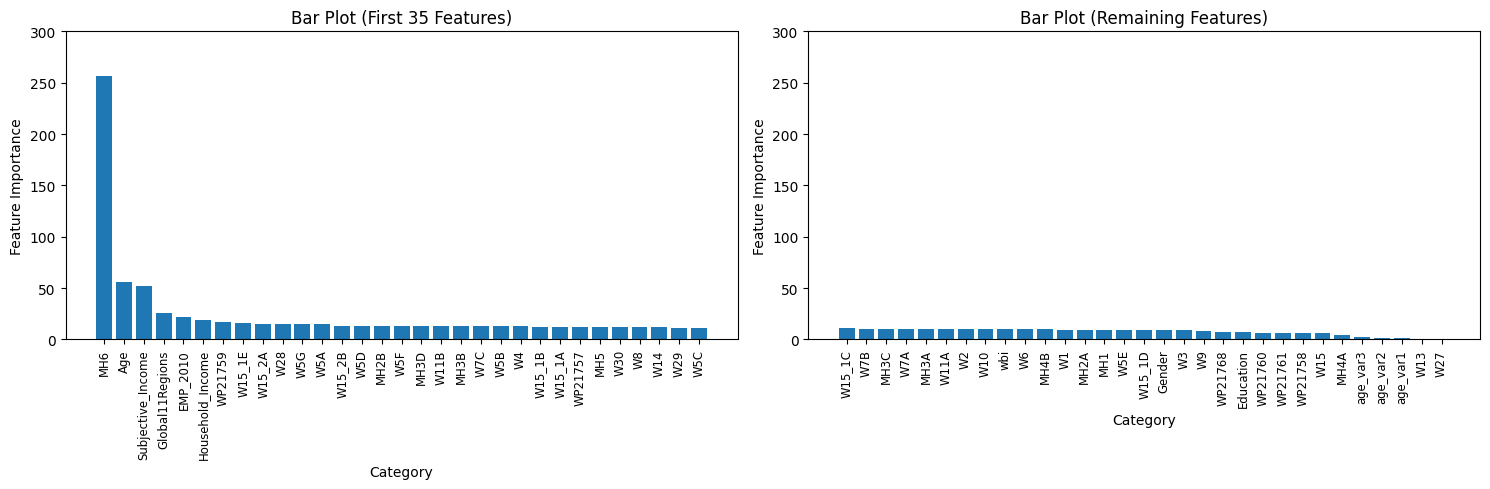

In [11]:
a=rf.feature_importances_

data1 = a * 1000
labels1 = ['W1', 'W2', 'W3', 'W4', 'W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G',
       'W6', 'W7A', 'W7B', 'W7C', 'W8', 'W9', 'W10', 'W11A', 'W11B', 'MH2A',
       'MH2B', 'W13', 'W14', 'W15', 'W15_1A', 'W15_1B', 'W15_1C', 'W15_1D',
       'W15_1E', 'W15_2A', 'W15_2B', 'MH1', 'MH3A', 'MH3B', 'MH3C', 'MH3D',
       'MH4A', 'MH4B', 'MH5', 'MH6', 'W27', 'W28', 'W29', 'W30', 'WP21757',
       'WP21758', 'WP21759', 'WP21760', 'WP21761', 'WP21768', 'Age',
       'age_var1', 'age_var2', 'age_var3', 'Gender', 'Education',
       'Household_Income', 'Global11Regions', 'wbi', 'Subjective_Income',
       'EMP_2010']

sorted_indices = np.argsort(data1)[::-1]
indices = range(len(data1))
data=[data1[i] for i in sorted_indices]
labels=[labels1[i] for i in sorted_indices]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(indices[:31], data[:31])
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Feature Importance')
axs[0].set_title('Bar Plot (First 35 Features)')
axs[0].set_xticks(indices[:31])
axs[0].set_xticklabels(labels[:31], rotation=90, fontsize='small')
axs[0].set_ylim(0,300)

axs[1].bar(indices[31:], data[31:])
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Feature Importance')
axs[1].set_title('Bar Plot (Remaining Features)')
axs[1].set_xticks(indices[31:])
axs[1].set_xticklabels(labels[31:], rotation=90, fontsize='small')
axs[1].set_ylim(0,300)

plt.tight_layout()
plt.show()

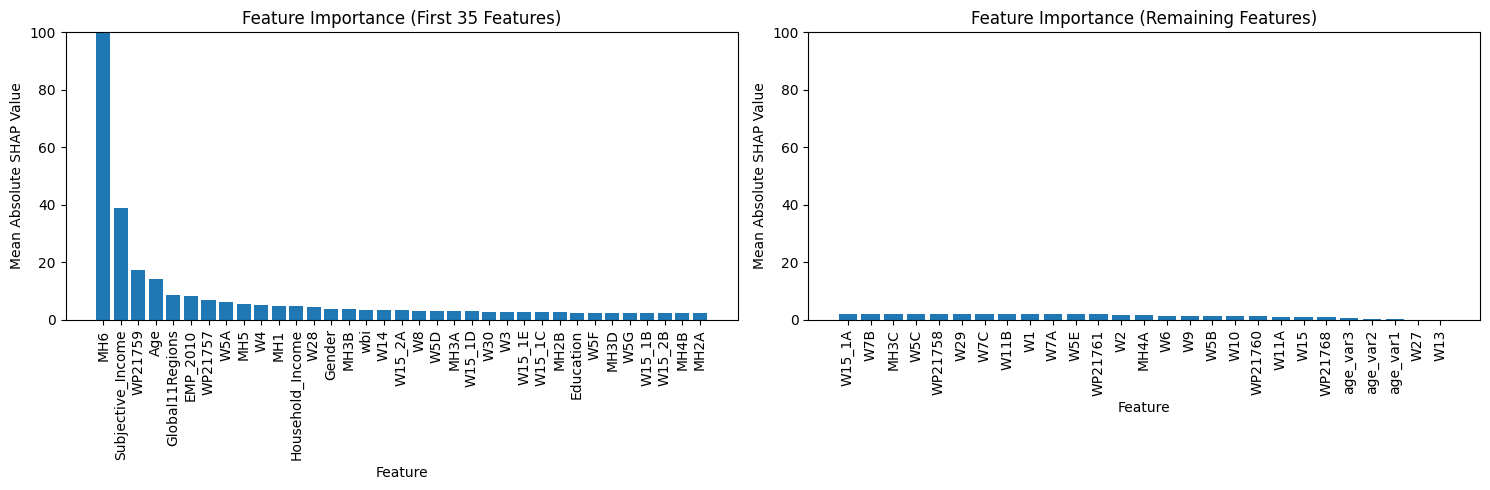

In [12]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(x_test)

mean_abs_shap_values = np.mean(np.abs(shap_values).mean(axis=0), axis=1)

shap_summary = pd.DataFrame(mean_abs_shap_values, index=x_test.columns, columns=['mean_abs_shap'])

shap_summary_sorted = shap_summary.sort_values(by='mean_abs_shap', ascending=False)*1000

first_35_features = shap_summary_sorted[:35]
remaining_features = shap_summary_sorted[35:]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(first_35_features.index, first_35_features['mean_abs_shap'])
axs[0].set_title('Feature Importance (First 35 Features)')
axs[0].set_ylabel('Mean Absolute SHAP Value')
axs[0].set_xlabel('Feature')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim(0,100)

axs[1].bar(remaining_features.index, remaining_features['mean_abs_shap'])
axs[1].set_title('Feature Importance (Remaining Features)')
axs[1].set_ylabel('Mean Absolute SHAP Value')
axs[1].set_xlabel('Feature')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0,100)

plt.tight_layout()
plt.show()
